# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
<br/><ol>
<li>The Smartcab does not move at all during the simulation. This may be because we did not train the Smartcab yet to move.
<li>The Driving agent is receiving Positive rewards for not taking any action when there is a red light and Negative rewards for not moving the cab when the light is green and there is no oncoming traffic.
<li>The Red Light expects the driving agent to not take any action. If it is done so, then there is a positive reward. If it fails to do so, then there is a negative reward. With the Green Light, there is an expectation that if there is no oncoming traffic, then the driving agent is supposed to move the cab. On doing so, there is a positive reward. A negative reward for the vice versa case.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**<br/>
<ol>
    <li><i>agent.py</i>
        <ol>
            <li>num_dummies: 
                <ul>
                <li>This flag determines how many number of dummy driving agents can be added to the simulation. 
                <li>The input is an integer value. The default value is 100. 
                <li>If we reduce this number, we will see few cabs in the simulation. If we increase the this number, we will see more cabs in the simulation.
                </ul>
            <li>grid_size: 
                <ul>
                <li>This flag associates the number of streets in the vertical as well as horizontal arrangements. 
                <li>It takes a Python tuple as input. The default value is (8,6)
                <li>The first value represents the vertical streets and the second value represents the horizontal streets.
                </ul>
            <li>log_metrics:
                <ul>
                <li>This flag conveys whether we are supposed to log the simulation and trial results to log folder, or not.
                <li>It takes a Python Boolean value as input. The default value is False. This states that the trials and simulation results must not be logged to the logs folder.
                <li>If the value is set to True, the trial and simulation results will be logged to the logs folder.
                </ul>
        </ol><br/>
    <li><i>simulator.py</i>
        <center>
        <table border=1>
            <tr>
                <th>render()
                <th>render_text()
            </tr>
            <tr>
                <td>It is the GUI render display of the simulation.
                <td>It is the non-GUI render display of the simulation.
            </tr>
            <tr>
                <td>The simulation trial data is displayed on the PyGame console.
                <td>Simulated trial data like `Agent idled at a green light with no oncoming traffic.` is rendered in the terminal/command prompt.
            </tr>
          </table>
          </center><br/>
    <li><i>planner.py</i>
        <ul>
        <li>The <b>next_waypoint()</b> function considers the East-West directions first and then followed by North-South directions. 
        </ul><br/>
    <li><i>environment.py</i>
    <ul>
    <li>The `act()` method seems to be called whenever an agent performs an action
    </ul>
</ol>

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


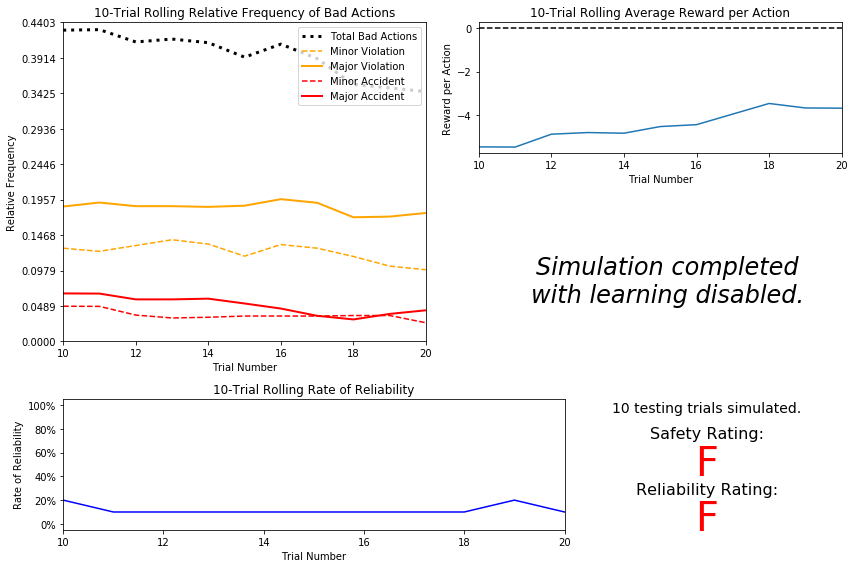

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**<br/>
<ol>
    <li>The driving agent made bad decisions approximately 43% of the time in the beginning. These bad decisions resulted in major accidents about 5-6% of the times, minor accidents about 4-5% of the times. However, there is a gradual drop in the bad decisions to around 35%. Due to this, there is minor drop in major accidents to 4% and minor accidents to 2-3%.
    <li>Since, the agent is driving randomly and there is no learning, the result does make sense. We are late for more than 80% of the time.
    <li>Initially, the reward is -6 because of the previously mentioned reasons. With subsequent trials, there is an improvement in the reward as well. The reward reaches to approximately -3 at the end. Since there is an improvement in the reward rate over a period of time, we cannot say that the driver is heavily penalized.
    <li>As the number of trials increases, we can see significant changes in the outcome. For example:
        <ul><li> Total bad actions falls from 44% to 34% approx.
        <li> Major violation falls from 19% to 17% approx.
        <li> Minor violation falls from 12% to 10% approx.
        <li> Major Accidents falls from 5.5% to 4% approx
        <li> Minor Accidents falls from 4.9% to 3.75% approx.
        </ul>
    <li>Looking at the current state of results, we cannot consider this smartcab safe or reliable for its passengers. This is because we are yet to train it on more data, optimize it, etc. or rather make the model learn the policy and then take appropriate actions accordingly. With more trials and learning, we will get a clear picture and our smartcab will be trained to take better decisions.
</ol>

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**<br/>
Actually all features are of atmost importance for ensuring both <b><i>safety</i></b> and <b><i>efficiency</i></b>. The debate just can't be made stating only few features are important and not all.
<ul>
<li><i>waypoint</i>: It is needed since it decides the path relative to the smartcab's heading. Without this feature, it will be difficult to reach the destination safely.
<li><i>inputs</i>: Since they give important details like the signal light and the existence of vehicles in appropriate directions, we really need them to make correct decisions like avoiding major / minor accidents, avoiding signal skipping, etc. This feature equally focusses on safety and efficiency.
<li><i>deadline</i>: It is a major feature which is needed for efficiency. It states whether we are on time to reach the destination or we have missed the deadline and now we cannot guarantee efficiency anymore.
</ul>

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**<br/>
Considering the input states specified in the answer for question 4, we can have the following states:
<center>
<table border=2>
<tr>
<th>Feature
<th>Number of States
<th>States
</tr>
<tr>
<td><i>waypoint</i>
<td>3
<td>Forward, Left, Right
</tr>
<tr>
<td><i>light</i>
<td>3 / 2
<td>Red, Green, Yellow (Assumption)
</tr>
<tr>
<td><i>left</i>
<td>4
<td>Forward, Left, Right, None
</tr>
<tr>
<td><i>right</i>
<td>4
<td>Forward, Left, Right, None
</tr>
<tr>
<td><i>oncoming</i>
<td>4
<td>Forward, Left, Right, None
</tr>
<tr>
<td><i>deadline</i>
<td>Depends. Can be ignored for now
<td>Possible value of an interger which keeps decrementing with every action taken
</tr>
</table>
</center>
<br/>Roughly, we can come up with 2 X 3 X 4 X 4 X 4 = 384 states for just the features. 384 is not a large number and I think the driving agent can learn a policy for each possible state within a reasonable number of training trials

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

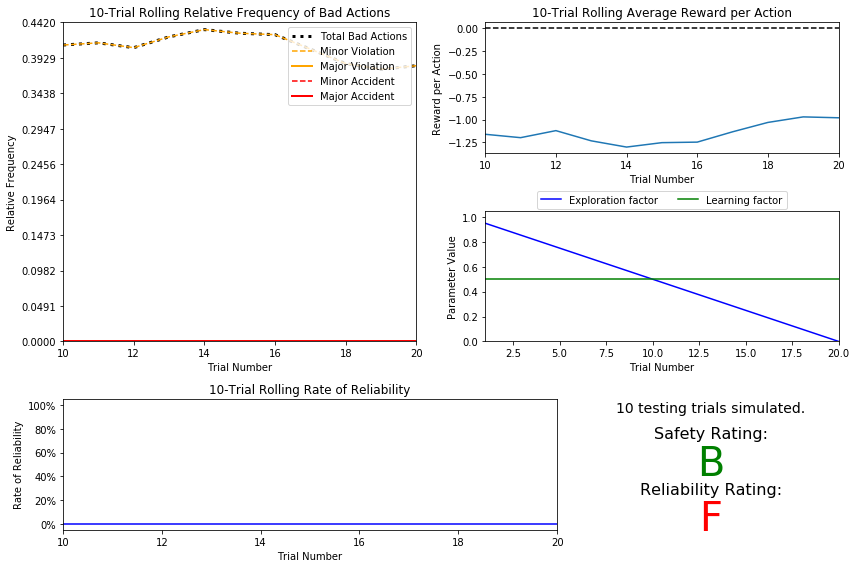

In [5]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**<br/>
<ol>
    <li> The bad actions continue to remain the same however the Major Violations and Major Accidents have come down to zero level.
    <li> I kept 20 as the number for training trials. The said number does make sense given the epsilon-tolerance.
    <li> Yes the decaying function is accurately represented in the parameters panel. I however changed the value for state as ('forward', 'red', None, None).
    <li> Yes, as the number of testing trials increased, the number of bad actions did decrease. The average reward came into the range of -1.125 to -1.0. This is a significant improvement
    <li> The rate of Reliability remains the same when compared to the basic agent. However, the Safety rating improves to 'B'.
</ol>

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

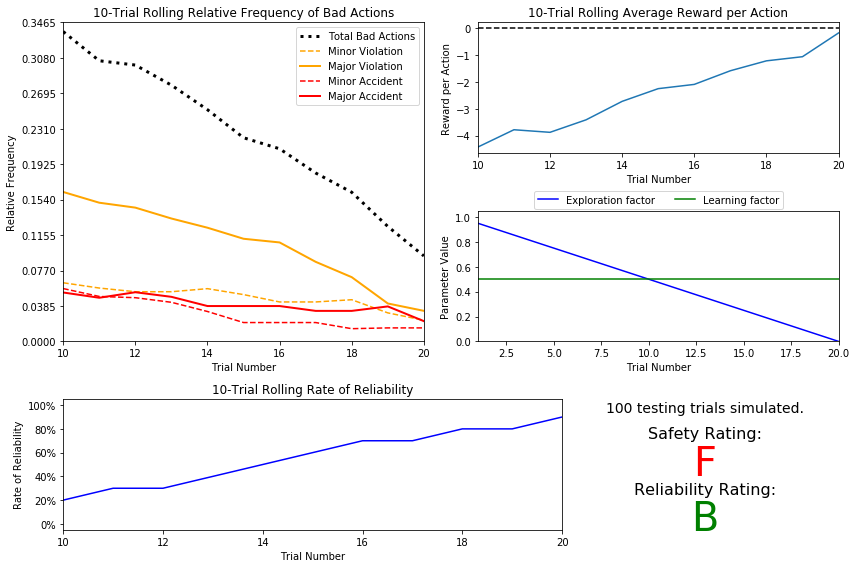

In [6]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning_1.csv')

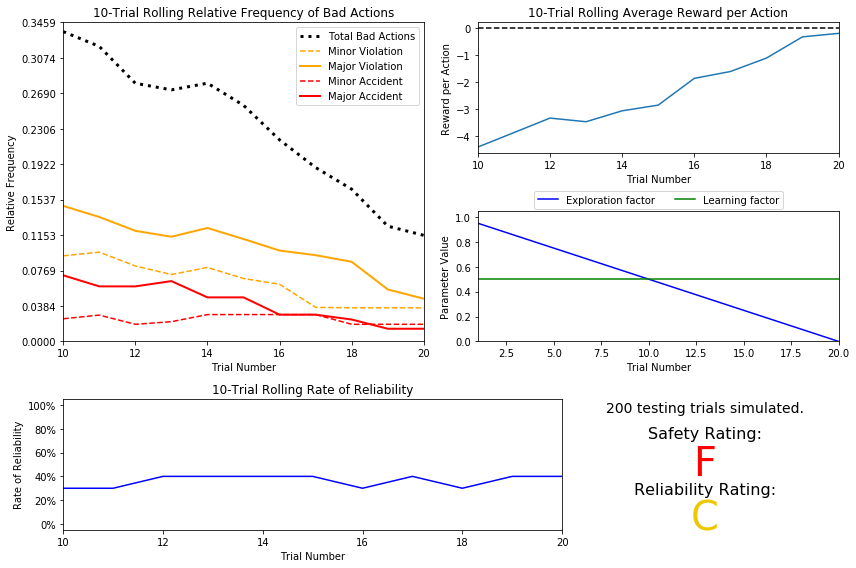

In [5]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning_2.csv')

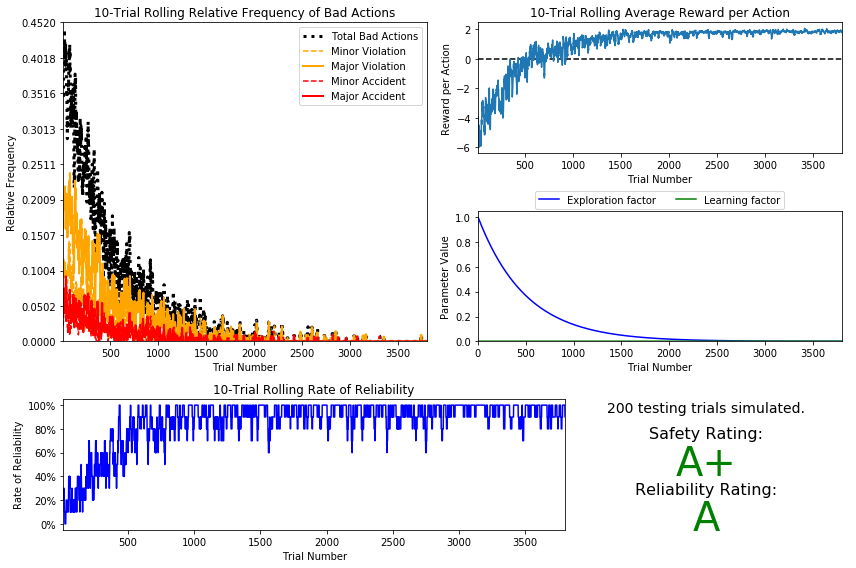

In [7]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**<br/>
<ol>
    <li> I used the negative decay function (self.epsilon = math.exp(-self.alpha * self.trial)) for exploration factor
    <li> Final number of trials reached to approx. 4000
    <li> I used 0.0005 as the epsilon tolerance and alpha as 0.002. I used this number since I was running more trials than earlier. I kept adjusting the values for these 2 terms but even then, I was not getting the desired rating. These were the final values which gave the improved rating as desired.
    <li> When compared to the default Q-Learner, the safety rating improved from B to A+ which is a significant improvement. The reliability rating improved from F to A which is a remarkable improvement.
    <li> Yes I would say that the Q-Learner results show that my driving agent successfully learnt an appropriate policy
    <li> Yes I am satisfied with the safety and reliability ratings of the Smartcab
</ol>

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** <br/>
According to me an optimal policy would be the one which satisfies the following conditions
<ul>
    <li> When the waypoint is right and the light is green and there are no vehicles on the right, go right.
    <li> When the waypoint is left and the light is green and there are no vehicles on the left, go left
    <li> When the waypoint is backward and the light is green, then either take a left or a right if no vehicle is present in the appropriate direction respectively
    <li> When the waypoint is None, the cab is reached to it's destination and it must stop
    <li> Obey all the traffic lights.
</ul>

Recording format (waypoint, light, left, oncoming)<br/>
Correct Policy Recordings:<br/>
<ol>
    <li>('left', 'green', 'forward', 'left') forward : 0.01, right : 0.01, None : 0.02, left : 0.63<br/>
    Here the waypoint is left and the signal is green, the left traffic is forward moving and oncoming traffic is left and we are taking left. The maximum score is for taking left. This is correct policy implementation.
    <li>('right', 'green', 'forward', 'right') forward : 0.01, right : 0.18, None : -0.02, left : -0.24<br/>
    Here the waypoint is right and the signal is green, the left traffic is forward moving and oncoming traffic is right and we are taking right. The maximum score is for taking right. This is correct policy implementation.
    <li>('left', 'red', 'right', 'left') forward : -0.20, right : 0.01, None : 0.50, left : -0.36<br/>
    Here the waypoint is left and the signal is red, the left traffic is right moving and oncoming traffic is left and we are supposed to stop and we stop since the maximum score is for stopping / not taking any action. This is correct policy implementation.
    <li>('right', 'red', 'forward', None) forward : -2.11, right : -0.78, None : 0.92, left : -2.26<br/>
    Here the waypoint is right and the signal is red, the left traffic is forward moving and there is no oncoming traffic and we are supposed to stop and we stop since the maximum score is for stopping / not taking any action. This is correct policy implementation.
    <li>('right', 'green', 'right', 'forward') forward : 0.00, right : 0.18, None : -0.01, left : -0.12<br/>
    Here the waypoint is right and the signal is green, the left traffic is right moving and oncoming traffic is forward moving and we are supposed to turn right and we do take a right since the maximum score is for taking right. This is correct policy implementation.
    <li>('left', 'red', 'right', 'right') forward : -0.02, right : 0.01, None : 0.17, left : 0.00<br/>
    Here the waypoint is left and the signal is red, the left traffic is right moving and oncoming traffic is right moving and we are supposed to stop and we do stop since the maximum score is for stopping / not taking any action. This is correct policy implementation.
</ol>
Incorrect Policy Recordings:<br/>
<ol>
    <li>('left', 'red', 'right', 'forward') forward : -0.06, right : 0.01, None : 0.34, left : -0.06<br/>
    We are supposed to go left and the light is red, so we should stop, which is what we are doing. But there is a positive reward associated with going right, even though that would make us farther from the destination. If we want to be efficient, we should not go right.
    <li>('forward', 'green', 'forward', 'left') forward : 0.82, right : 0.02, None : 0.02, left : 0.01<br/>
    We are supposed to go forward and the signal is green and we are going forward. Again here efficiency comes into picture. Except for going forward, all other states should have a negative rating, but all have a positive rating.
</ol>

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.